In [2]:
%env CUDA_VISIBLE_DEVICES=""
%env TF_CPP_MIN_LOG_LEVEL="2"

In [ ]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist


In [3]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


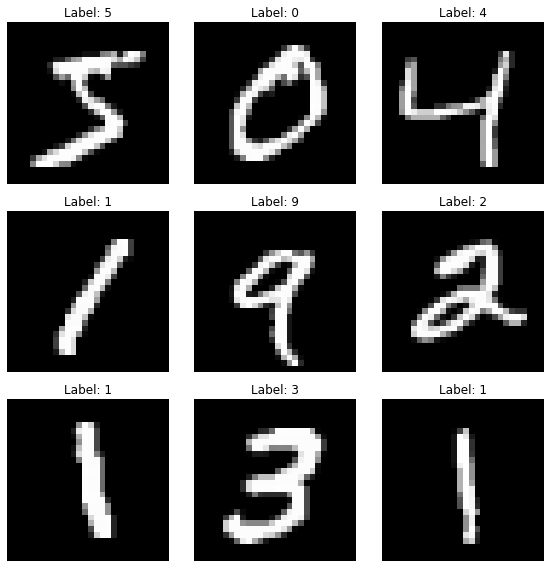

In [4]:

# Visualize a sample of the training data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [5]:

# Preprocess the data
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [6]:

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [7]:

# Define the model architecture
model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])


In [8]:

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.4811 - accuracy: 0.8531 - val_loss: 0.1038 - val_accuracy: 0.9702
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1158 - accuracy: 0.9652 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0713 - accuracy: 0.9772 - val_loss: 0.0824 - val_accuracy: 0.9782
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0555 - accuracy: 0.9820 - val_loss: 0.0727 - val_accuracy: 0.9787
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0477 - accuracy: 0.9849 - val_loss: 0.0602 - val_accuracy: 0.9827
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0691 - val_accuracy: 0.9822
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0656 - val_accuracy: 0.9813
Epoch 

In [10]:

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9812
Test accuracy: 0.9811999797821045


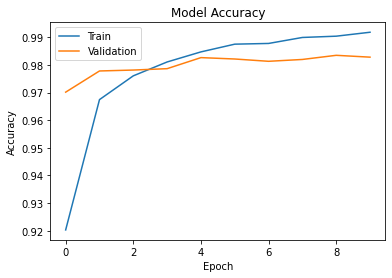

In [11]:

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
